In [1]:
%matplotlib qt

In [1]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_91451/4042748947.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [2]:
wkdir = [
     '/Users/yao/Documents/Data/PETAL2025/petal04_r*', # 2D, long pre-plasmas 200 um
     '/Users/yao/Documents/Data/PETAL2025/petal03', # 2D, fix the target thickness
     '/Users/yao/Documents/Data/PETAL2025/petal02', # 2D, fix the target thickness
     '/Users/yao/Documents/Data/PETAL2025/petal01', # 2D, 100 um pre-plasmas
     '/Users/yao/Documents/Data/PETAL2025/petal00', # 2D, 150 um pre-plasmas
    ]

In [3]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/1e-6)
# S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.0*np.pi*3e8/1e-6)

I_0 = 5.2e+18 W/cm2
a_0 =  1.9520309718088114
I_1 = 6.2e+17 W/cm2
a_1 =  0.6720163062308093
Loaded simulation '/Users/yao/Documents/Data/PETAL2025/petal04_r0'
I_0 = 5.2e+18 W/cm2
a_0 =  1.9520309718088114
I_1 = 6.2e+17 W/cm2
a_1 =  0.6720163062308093
Loaded simulation '/Users/yao/Documents/Data/PETAL2025/petal04_r1'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


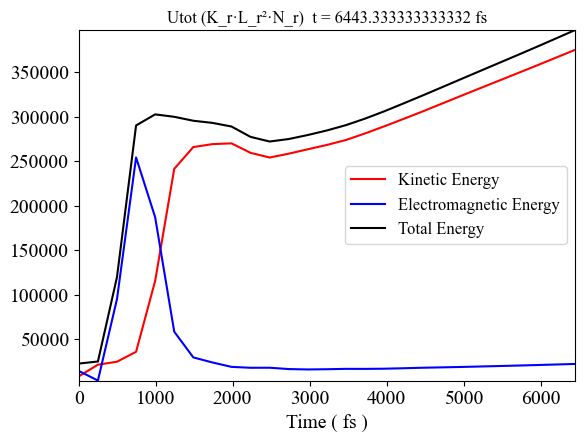

In [5]:
ukin = S0.Scalar('Ukin', units=['fs','J'], color='r', label='Kinetic Energy')
uelm = S0.Scalar('Uelm', units=['fs','J'], color='b', label='Electromagnetic Energy')
utot = S0.Scalar('Utot', units=['fs','J'], color='k', label='Total Energy')

happi.multiPlot(ukin, uelm, utot)


In [10]:
Lx  = S0.namelist.Lsim[0]
Ly  = S0.namelist.Lsim[1]
print('Lx = ', Lx)
print('Ly = ', Ly)

Prad_unit  = 5.11e5 * 1.6e-19 * 3e10 * 1.1e21 / 0.8 / 6.28 * 1e-4 * 1e-4 # J/s/um [the last 1e-4 is cm->um]

Lx =  3015.928947446201
Ly =  3015.928947446201


In [14]:
350000 / (Prad_unit * 480 * 480)

2.828657580369909e-10

In [6]:
S0.Field(0,'Ey',units=['fs','um','V/m'],vsym=True).slide()

Field diagnostic #0: Ey
	Grid spacing: 1.5707963267948966, 1.5707963267948966


In [7]:
S0.Field(1,'Ex',units=['fs','um','V/m'],vsym=True).slide()

Field diagnostic #1: Ex
	Grid spacing: 1.5707963267948966, 1.5707963267948966


In [17]:
from numpy import array, arange

tr = 1./(2.*np.pi*3e8/0.810e-6)*1e15
print('tr = ', tr)

tstop = S0.namelist.Main.simulation_time*tr # simulation final time
tstep = S0.namelist.Main.timestep        # simulation timestep
times = arange(0., tstop, tstep)

laser = S0.namelist.Laser[1]
laser_profile = array([laser.time_envelope(t) for t in times])


plt.plot( times, laser_profile**2 )
plt.xlabel('Time (fs)')
plt.ylabel('Laser profile (a.u.)')
plt.ylim([0, 1])
plt.xlim([0, tstop])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], ['0', '0.25', '0.5', '0.75', '1'])
plt.grid(linestyle='--', linewidth=0.5,alpha=0.5)

tr =  0.42971834634811745



#0 - Number density of species # 0
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


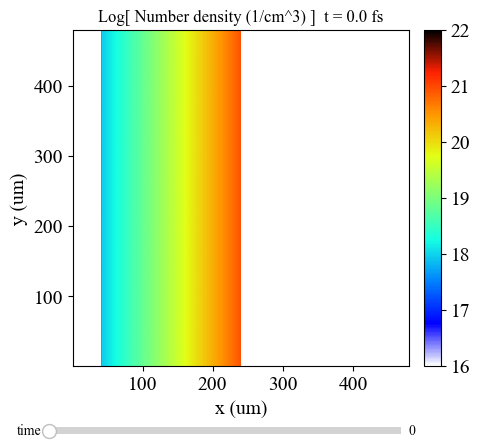

In [12]:
S0.ParticleBinning(0, units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=16,vmax=22,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()

In [6]:
S0.ParticleBinning(1, units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=16,vmax=22,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()


#1 - Number density of species # 3
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [10]:
S0.ParticleBinning(2, units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=16,vmax=22,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()


#2 - Number density of species # 4
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [11]:
S0.ParticleBinning("#0+#1+#2", units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=16,vmax=22,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()


#0 - Number density of species # 0
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

#1 - Number density of species # 3
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

#2 - Number density of species # 4
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

Operation : #0+#1+#2
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [5]:
S0.ParticleBinning(3, units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=17,vmax=23,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()


#3 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [13]:
S0.ParticleBinning(4, units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=17,vmax=23,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()


#4 - Number density of species # 2
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [14]:
S0.ParticleBinning('#3+#4', units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  xmin=0,xmax=32,
                        #  ymin=0,ymax=32,
                         vmin=17,vmax=23,
                         cmap=newcmap,
                         aspect=1.0,
                   ).slide()


#3 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

#4 - Number density of species # 2
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 3015.93 in 400 steps 

Operation : #3+#4
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [15]:
S0.ParticleBinning(5, units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   ).slide()


#5 - Number density of species # 0
    x from 0 to 3015.93 in 400 steps 
    px from -800 to 800 in 800 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [16]:
S0.ParticleBinning(6, units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   ).slide()


#6 - Number density of species # 3
    x from 0 to 3015.93 in 400 steps 
    px from -800 to 800 in 800 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [6]:
S0.ParticleBinning(7, units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-6,vmax=-2,
                  #  ymin=-400,ymax=400,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   ).slide()


#7 - Number density of species # 4
    x from 0 to 3015.93 in 400 steps 
    px from -800 to 800 in 800 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [18]:
S0.ParticleBinning(8, units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-6,
                   vmax=-2,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                   ymin=-30,ymax=30,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   ).slide()


#8 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 
    px from -50 to 50 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [19]:
S0.ParticleBinning(9, units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-6,
                   vmax=-2,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   ).slide()


#9 - Number density of species # 2
    x from 0 to 3015.93 in 400 steps 
    px from -20 to 20 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [5]:
es0 = S0.ParticleBinning(10, units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   cmap=newcmap,
                   label= '200 um',
                  #  label='100 um',
                  color='red',
                   xmin=5,xmax=40,
                   vmin=-7.5,vmax=-4.5,
                   ).slide()

# es1 = S1.ParticleBinning(10, units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    cmap=newcmap,
#                    label='50 um',
#                   #  label='100 um',
#                    xmin=5,xmax=40,
#                    vmin=-7,vmax=-4,
#                    )#.slide()

# happi.multiSlide(es0,es1)


#10 - Number density of species # 4
    ekin from 0.000195695 to 195.695 in 5000 steps 

Operation : #10
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [5]:
S0.ParticleBinning(11, units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   cmap=newcmap,
                #    vmin=-6,
                #    vmax=-2,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   ).slide()


#11 - Number density of species # 3
    ekin from 0.000195695 to 391.389 in 5000 steps 

Operation : #11
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [7]:
es0 = S0.ParticleBinning(12, units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   label= '100 um',
                   cmap=newcmap,
                  #  ymin=0,ymax=50,
                   vmin=-9,
                   vmax=-4,
                  #  aspect=1.0,
                   xmin=5,xmax=40,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                  #  layout='tight',
                   sum={'y':'all'}
                   ).slide()

# es1 = S1.ParticleBinning(12, units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    label= '50 um',
#                    cmap=newcmap,
#                   #  ymin=0,ymax=50,
#                    vmin=-9,
#                    vmax=-6,
#                   #  aspect=1.0,
#                    xmin=1,xmax=35,
#                 #    ymin=-200,ymax=600,
#                 #    aspect='auto',
#                   #  layout='tight',
#                    sum={'y':'all'}
#                    )#.slide()

# happi.multiSlide(es0,es1)


#12 - Number density of species # 1
    y from 0 to 3015.93 in 400 steps 
    ekin from 0.000195695 to 195.695 in 500 steps 

Operation : #12
average for all y
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



In [6]:
S0.ParticleBinning(13, units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   cmap=newcmap,
                   ymin=0,ymax=40,
                   vmin=-6,
                   vmax=-2,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                  #  layout='tight',
                #    sum={'y':'all'}
                   ).slide()


#13 - Number density of species # 2
    y from 0 to 3015.93 in 400 steps 
    ekin from 0.000195695 to 195.695 in 500 steps 

Operation : #13
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



In [21]:
S0.ParticleBinning(14, units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   cmap=newcmap,
                #    ymin=0,ymax=50,
                   vmin=-6,
                   vmax=-2,
                  #  aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                  #  layout='tight',
                #    sum={'y':'all'}
                   ).slide()


#14 - Number density of species # 1,2
    px from -50 to 50 in 400 steps 
    py from -50 to 50 in 400 steps 

Operation : #14
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [6]:
es0 = S0.Screen(0, units=['fs','um','1/cm^3','MeV'],
          data_log='True',
          label='100 um',
        #   vmin=-8,vmax=-5,
          vmin=-9,vmax=-4,
          sum={'y':'all'},
          xmin=5,xmax=40,
          ).slide()#.plot(saveAs='/Users/yao/Desktop/e-spec_screen0.png',transparent=True)

# es1 = S1.Screen(0, units=['fs','um','1/cm^3','MeV'],
#           data_log='True',
#           label='50 um',
#           sum={'y':'all'},
#           vmin=-8,vmax=-4,
#           xmin=5,xmax=35,
#           )#.slide()

# happi.multiSlide(es0,es1)


#0 - Number density of species # 1,2
    y from 0 to 3015.93 in 400 steps 
    ekin from 0.000195695 to 195.695 in 500 steps 

average for all y
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [4]:
energy = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))
data   = np.array( S0.Screen(0, units=['fs','um','1/cm^3','MeV'],sum={'y':'all'},).getData()[-1])

In [11]:
simu_dnde_e0   = np.array(S0.Screen(0, units=['mm','fs','MeV','cm^-3']).getData()[-1]) 

In [18]:
np.savetxt('/Users/yao/Desktop/petal24_energy.txt', energy)

In [5]:
np.savetxt('/Users/yao/Desktop/petal24_data.txt', data)

In [16]:
data.shape

(500,)

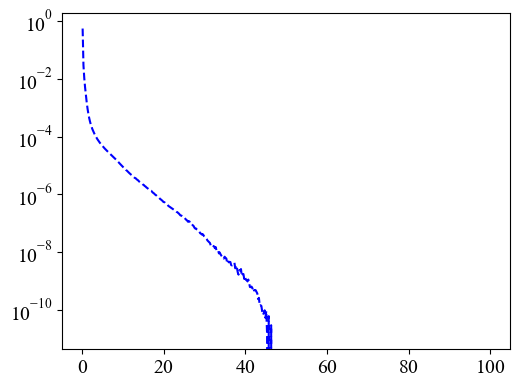

In [6]:
width  = 3.14 *2.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')

ax.plot(energy,
        data, 
        label="Promised case: Sim.",
        color='blue',
        linestyle='--')

In [7]:
S0.Screen(1, units=['fs','um','1/cm^3','MeV'],
          data_log='True',
        #   sum={'y':'all'},
          ).slide()


#1 - Number density of species # 4
    ekin from 0.000195695 to 195.695 in 5000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [10]:
S0.Screen(0, units=['fs','um','1/cm^3','MeV'],
          data_log='True',
        #   sum={'y':'all'},
        #   vmin=-8,vmax=-5,
          sum={'y':'all'},
          xmin=0,xmax=30,
          ).slide()


#0 - Number density of species # 1,2
    y from 0 to 2010.62 in 400 steps 
    ekin from 0.000195695 to 195.695 in 500 steps 

average for all y
The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]

